In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

import matplotlib.pyplot as plt
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


# Lets explore the Sales Data

In [4]:
df = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [11]:
df.describe(include='all')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,778-34-2523,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,19:48,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


## Let's start with easy questions:
1. sales volume by gender
2. sales volume by product line
3. sales volume by payment type
4. which city has which type of customers

In [5]:
#1. sales volume by gender

dfgender = df.groupby(['Gender'], sort=False)['Gender','Total'].sum()
dfgender.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Total
Gender,
Female,167882.925
Male,155083.824


In [12]:
#2. sales volume by product line

dfpline = df.groupby(['Product line'], sort=False)['Total','Quantity'].sum()
dfpline.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Quantity
Product line,,
Health and beauty,49193.7390,854
Electronic accessories,54337.5315,971
Home and lifestyle,53861.9130,911
Sports and travel,55122.8265,920
Food and beverages,56144.8440,952
Fashion accessories,54305.8950,902


In [13]:
#3. sales volume by payment type

dfpmnttype = df.groupby(['Payment'], sort=False)['Total','Quantity'].sum()
dfpmnttype.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Quantity
Payment,,
Ewallet,109993.107,1892
Cash,112206.570,1896
Credit card,100767.072,1722


In [27]:
#4. which city has which type of customers

dfcust = df.groupby(['City', 'Customer type'], sort=False)['Total'].count()
dfcust.head(10)

City       Customer type
Yangon     Member           167
Naypyitaw  Normal           159
Yangon     Normal           173
Mandalay   Member           165
           Normal           167
Naypyitaw  Member           169
Name: Total, dtype: int64

In [31]:
#how many Customer type "Member" are there in Yangon?
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [54]:
#how many times does value "Yangon" occur?
df.City.value_counts().Yangon

340

In [68]:
dfplot = df[["City","Gender","Product line","Total"]]
dfplot

,City,Gender,Product line,Total
0,Yangon,Female,Health and beauty,548.9715
1,Naypyitaw,Female,Electronic accessories,80.2200
2,Yangon,Male,Home and lifestyle,340.5255
3,Yangon,Male,Health and beauty,489.0480
4,Yangon,Male,Sports and travel,634.3785
...,...,...,...,...
995,Naypyitaw,Male,Health and beauty,42.3675
996,Mandalay,Female,Home and lifestyle,1022.4900
997,Yangon,Male,Food and beverages,33.4320
998,Yangon,Male,Home and lifestyle,69.1110


In [70]:
#Which city sells how much of each Product line?
pd.pivot_table(dfplot , values = 'Total' , index = 'City' , columns = 'Product line' , aggfunc = 'count')

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
City,,,,,,
Mandalay,55,62,50,53,50,62
Naypyitaw,55,65,66,52,45,45
Yangon,60,51,58,47,65,59


In [75]:
#Which type of payment is more popular when paying for a certain product line?
pd.pivot_table(df , values = 'Total' , index = 'Product line' , columns = 'Payment' , aggfunc = 'count')

Payment,Cash,Credit card,Ewallet
Product line,,,
Electronic accessories,71,46,53
Fashion accessories,57,56,65
Food and beverages,57,61,56
Health and beauty,49,50,53
Home and lifestyle,51,45,64
Sports and travel,59,53,54


<AxesSubplot:xlabel='Payment', ylabel='count'>

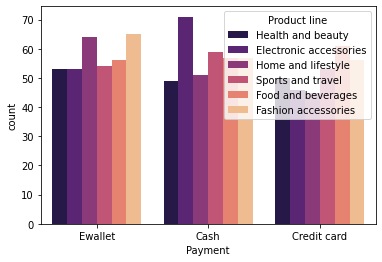

In [80]:
sns.countplot(data = df , x = 'Payment' , hue = 'Product line'  , palette = 'magma')

In [72]:
pd.pivot_table(df , values = 'Total' , index = 'City' , columns = 'Payment' , aggfunc = 'count')

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


<AxesSubplot:xlabel='City', ylabel='count'>

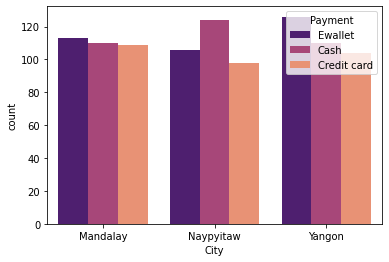

In [79]:
sns.countplot(data = df , x = 'City' , hue = 'Payment'  , palette = 'magma')